In [ ]:
#Load Packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글지원 설정 
import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Load Data

In [45]:
cctv = pd.read_csv('seoulCCTV.csv', encoding='utf-8')
pop = pd.read_excel('seoulPopulation.xlsx')

In [46]:
# Data Preprocessing

In [48]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [50]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [16]:
cctv.isnull().sum()

기관명          0
소계           0
2013년도 이전    0
2014년        0
2015년        0
2016년        0
dtype: int64

In [17]:
pop.isnull().sum()

기간          0
자치구         0
세대          0
인구          0
인구.1        0
인구.2        0
인구.3        0
인구.4        0
인구.5        0
인구.6        0
인구.7        0
인구.8        0
세대당인구       0
65세이상고령자    0
dtype: int64

# **MP2_1**

1. 구별 CCTV 설치 수 


In [86]:
cctv_sorted = cctv.sort_values(by='소계', ascending=False)

In [87]:
cctv_sorted

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


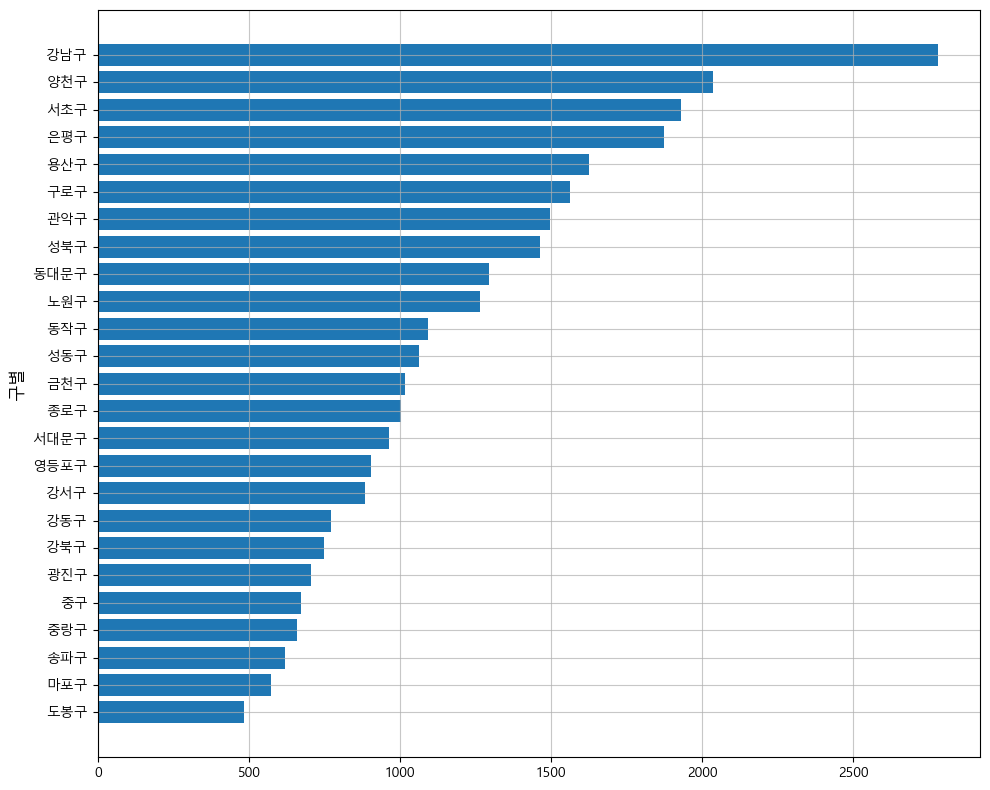

In [124]:
plt.figure(figsize=(10,8))  
plt.barh(cctv_sorted['자치구'], cctv_sorted['소계'])
# plt.xlabel('CCTV 수',fontsize=12)
plt.ylabel('구별',fontsize=12)
# plt.title('구별 CCTV 설치 현황',fontsize=15)
plt.gca().invert_yaxis() #상위데이터 위족에 배치
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

# **MP2_2**

2. 구별 cctv 설치수 대비 인구비율


In [76]:
cctv.rename(columns={'기관명':'자치구'},inplace=True)
data = pd.merge(cctv, pop, on='자치구',how='inner')

In [72]:
data.head(5)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,기간,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,강남구,2780,1292,430,584,932,2017.1/4,234107,570500,273301,297199,565550,270726,294824,4950,2575,2375,2.42,63167
1,강동구,773,379,99,155,377,2017.1/4,179676,453233,225427,227806,449019,223488,225531,4214,1939,2275,2.5,54622
2,강북구,748,369,120,138,204,2017.1/4,141554,330192,161686,168506,326686,160353,166333,3506,1333,2173,2.31,54813
3,강서구,884,388,258,184,81,2017.1/4,247696,603772,294433,309339,597248,291249,305999,6524,3184,3340,2.41,72548
4,관악구,1496,846,260,390,613,2017.1/4,253826,525515,264763,260752,507203,256090,251113,18312,8673,9639,2,68082


In [77]:
# CCTV 비율 계산
data['cctv ratio'] = (data['소계']/data['인구'])*100
data1 = data.sort_values(by='cctv ratio',ascending=False)

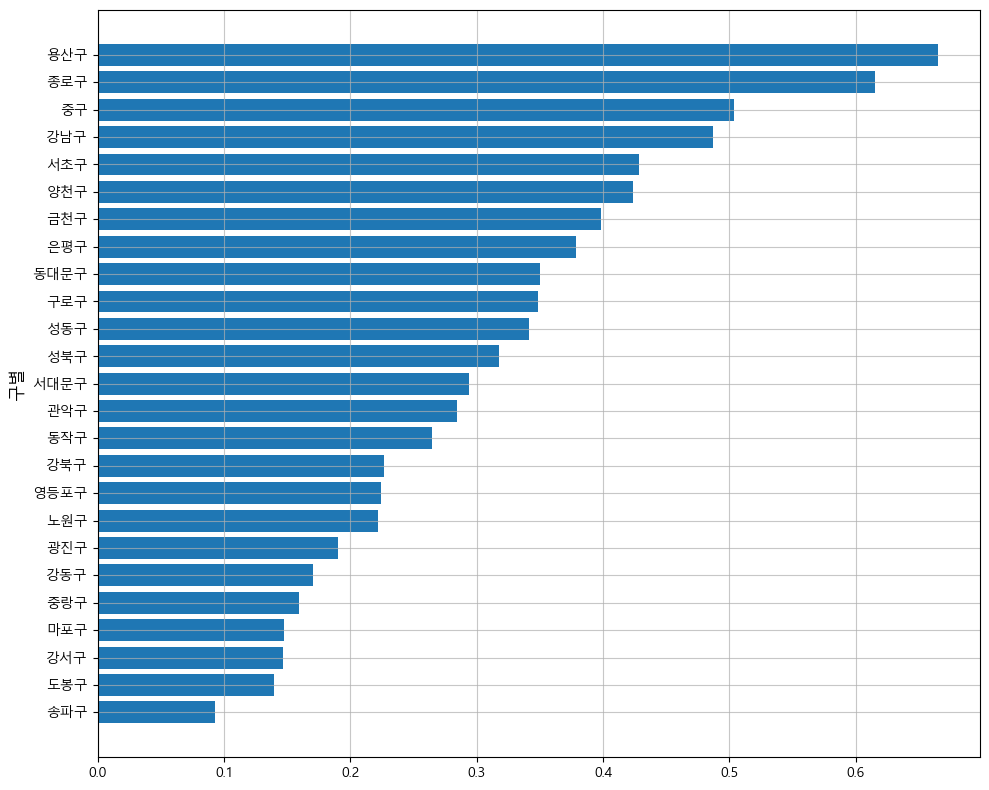

In [125]:
plt.figure(figsize=(10,8))
plt.barh(data1['자치구'],data1['cctv ratio'])
# plt.xlabel('CCTV 비율',fontsize=12)
plt.ylabel('구별',fontsize=12)
# plt.title('구별 CCTV 비율',fontsize=15)
plt.gca().invert_yaxis()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

# **MP2_3**

3. 구별 인구수에 따른 cctv 비율 산점도 및 Line plot 


In [126]:
data['인구'] = pd.to_numeric(data['인구'], errors='coerce') 
data['소계'] = pd.to_numeric(data['소계'], errors='coerce')

data = data.dropna(subset=['인구', '소계'])

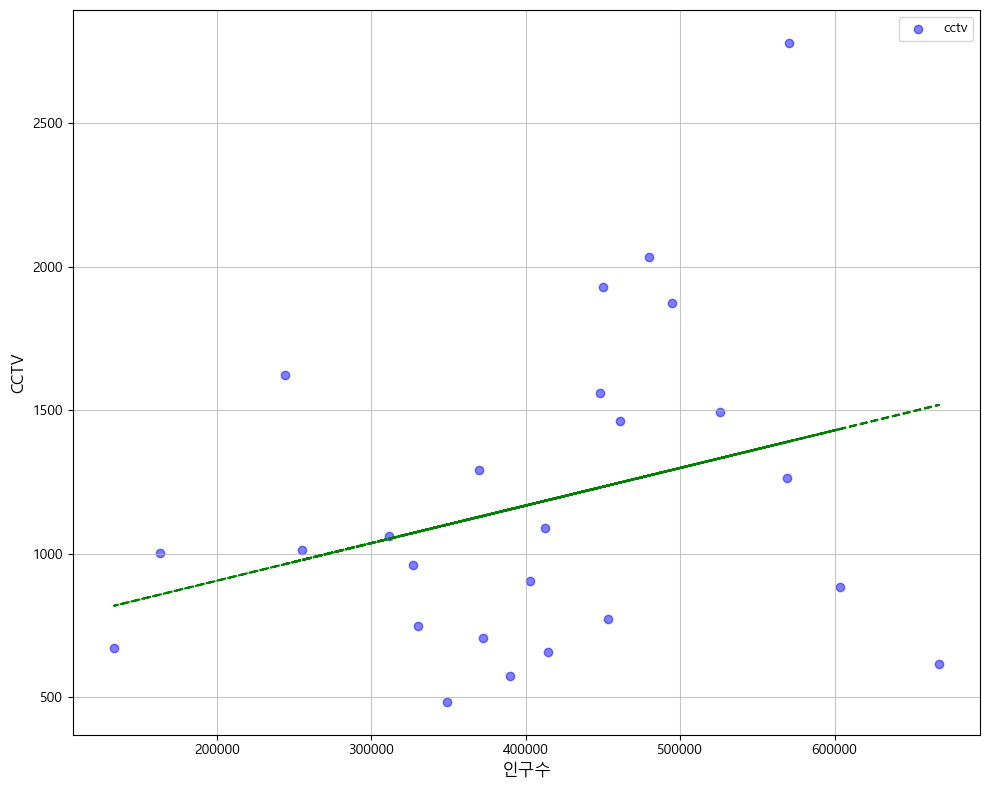

In [134]:
plt.figure(figsize=(10,8))
plt.scatter(data['인구'],data['소계'],label='cctv',color='blue',alpha=0.5) 

# # add regression line
coefficients = np.polyfit(data['인구'], data['소계'], 1)
regression_line = np.poly1d(coefficients)
plt.plot(data['인구'], regression_line(data['인구']), color='green', linestyle='--')

plt.xlabel('인구수',fontsize=12)    
plt.ylabel('CCTV',fontsize=12)
# plt.title('인구수와 CCTV 수의 관계',fontsize=15)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

# **MP2_4**

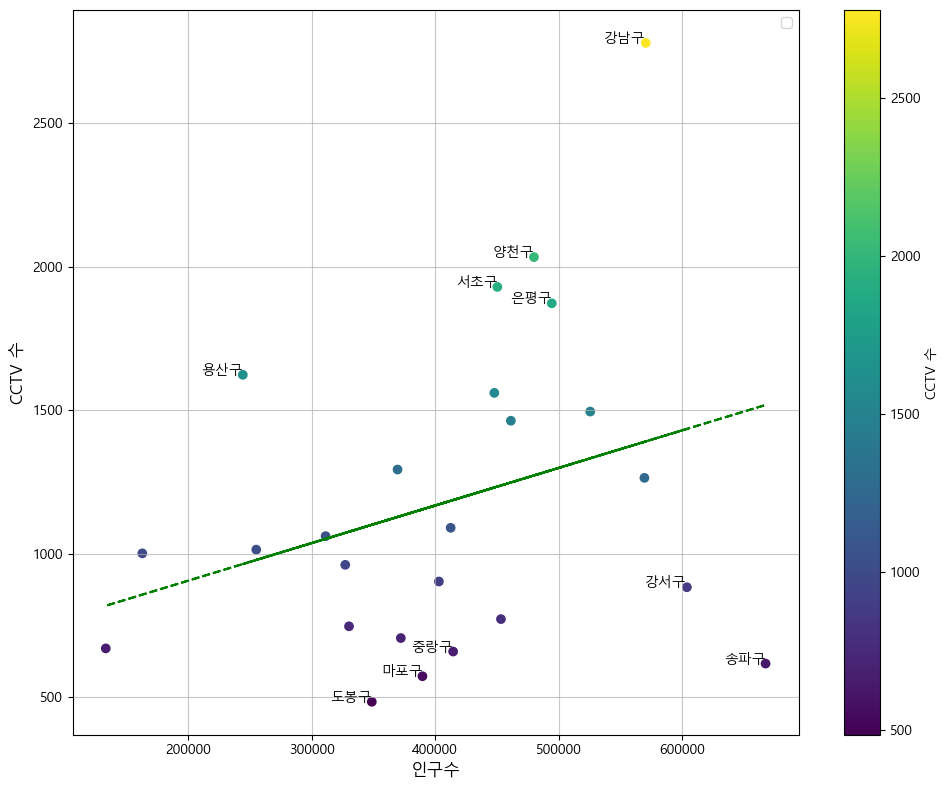

In [151]:
coefficients = np.polyfit(data['인구'], data['소계'], 1) 
regression_line = np.poly1d(coefficients)
# 회귀선과의 거리 계산
data['회귀선값'] = regression_line(data['인구'])  # 회귀선 값
data['거리'] = np.abs(data['소계'] - data['회귀선값'])  # 실제 값과 회귀선 값의 절대 거리


plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['인구'], data['소계'], c=data['소계'], cmap='viridis')
plt.colorbar(scatter, label='CCTV 수')  # color bar

# regression line 
plt.plot(data['인구'], regression_line(data['인구']), color='green', linestyle='--')

# 회귀선과의 거리 기반 구 표시 
threshold = 100  # 회귀선과의 거리 임계값
for i, row in data.iterrows():
    if row['거리'] > threshold:  # 회귀선에서 임계값보다 먼 경우만 표시
        plt.text(row['인구'], row['소계'], row['자치구'], fontsize=10, ha='right')
        
plt.xlabel('인구수', fontsize=12)
plt.ylabel('CCTV 수', fontsize=12)
# plt.title('인구수와 CCTV 수의 관계', fontsize=15)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


##### 인구가 많은수록 CCTV 설치 대수가 증가하는 경향있음.
##### 그렇지만 지역별 특성에 따라 회귀선에서 벗어난 데이터가 존재하기에 인사이트를 얻기 위해서는 추가적인 자료 필요할듯 